This code was copied from 
https://realpython.com/python-scipy-fft/


Will be used in future executions

In [15]:
import scipy, matplotlib
print(scipy.__file__)
print(matplotlib.__file__)


c:\Users\Oussama\Documents\GitHub\Fourrier-Transform-Python\env\lib\site-packages\scipy\__init__.py
c:\Users\Oussama\Documents\GitHub\Fourrier-Transform-Python\env\lib\site-packages\matplotlib\__init__.py


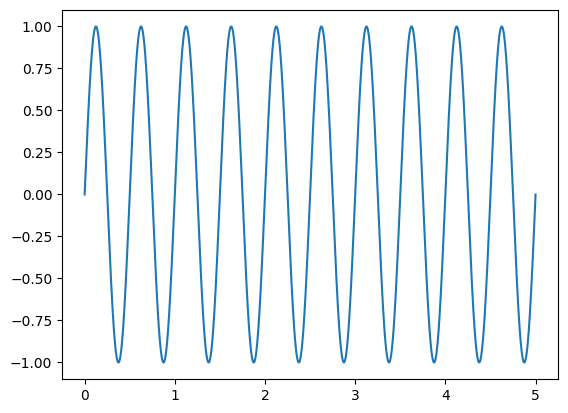

In [16]:
import numpy as np
from matplotlib import pyplot as plt

SAMPLE_RATE = 44100  # Hertz
DURATION = 5  # Seconds

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

# Generate a 2 hertz sine wave that lasts for 5 seconds
x, y = generate_sine_wave(2, SAMPLE_RATE, DURATION)
plt.plot(x, y)
plt.show()

Mixing Audio Signals
The good news is that mixing audio signals consists of just two steps:

Adding the signals together
Normalizing the result
Before you can mix the signals together, you need to generate them:

In [17]:
_, nice_tone = generate_sine_wave(400, SAMPLE_RATE, DURATION)
_, noise_tone = generate_sine_wave(4000, SAMPLE_RATE, DURATION)
noise_tone = noise_tone * 0.3

mixed_tone = nice_tone + noise_tone

There’s nothing new in this code example. It generates a medium-pitch tone and a high-pitch tone assigned to the variables nice_tone and noise_tone, respectively. You’ll use the high-pitch tone as your unwanted noise, so it gets multiplied by 0.3 to reduce its power. The code then adds these tones together. Note that you use the underscore (_) to discard the x values returned by generate_sine_wave().

The next step is normalization, or scaling the signal to fit into the target format. Due to how you’ll store the audio later, your target format is a 16-bit integer, which has a range from -32768 to 32767:

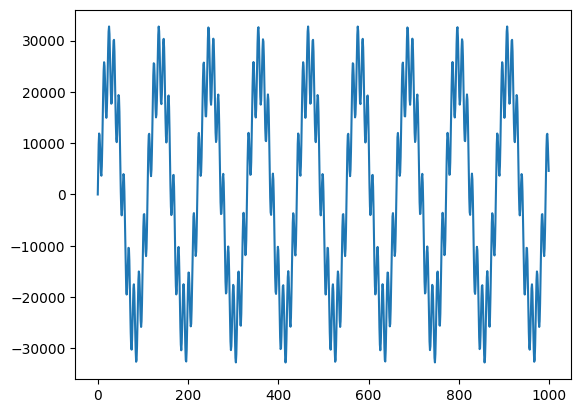

In [18]:
normalized_tone = np.int16((mixed_tone / mixed_tone.max()) * 32767)

plt.plot(normalized_tone[:1000])
plt.show()

In [19]:
from scipy.io.wavfile import write

# Remember SAMPLE_RATE = 44100 Hz is our playback rate
write("mysinewave.wav", SAMPLE_RATE, normalized_tone)

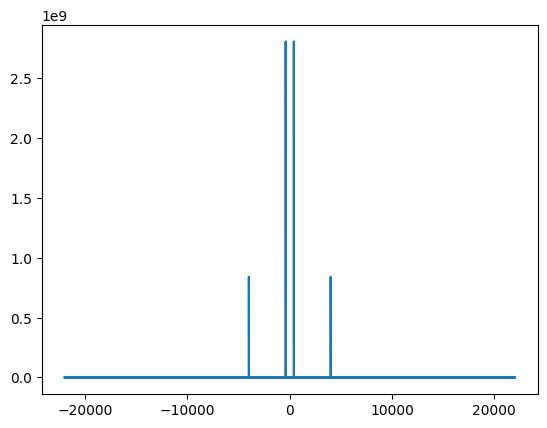

In [20]:
from scipy.fft import fft, fftfreq

# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

yf = fft(normalized_tone)
xf = fftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

In [21]:
f = fft(normalized_tone)
xf = fftfreq(N, 1 / SAMPLE_RATE)

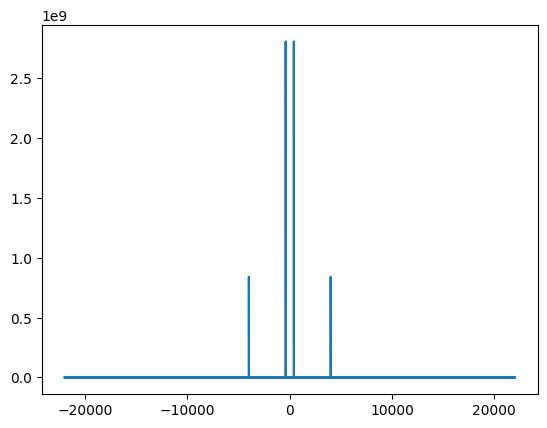

In [22]:
plt.plot(xf, np.abs(yf))
plt.show()


In [23]:
yf = fft(normalized_tone)
xf = fftfreq(N, 1 / SAMPLE_RATE)

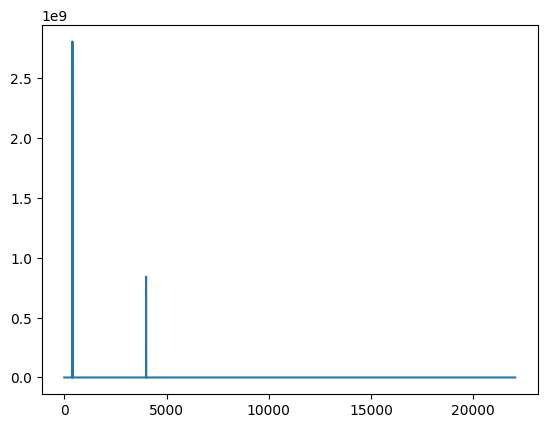

In [24]:
from scipy.fft import rfft, rfftfreq

# Note the extra 'r' at the front
yf = rfft(normalized_tone)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

Filtering the Signal


In [25]:
# The maximum frequency is half the sample rate
points_per_freq = len(xf) / (SAMPLE_RATE / 2)

# Our target frequency is 4000 Hz
target_idx = int(points_per_freq * 4000)

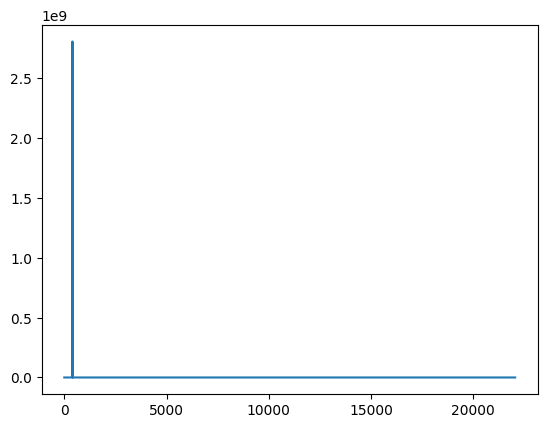

In [26]:
yf[target_idx - 1 : target_idx + 2] = 0

plt.plot(xf, np.abs(yf))
plt.show()

Applying the Inverse FFT


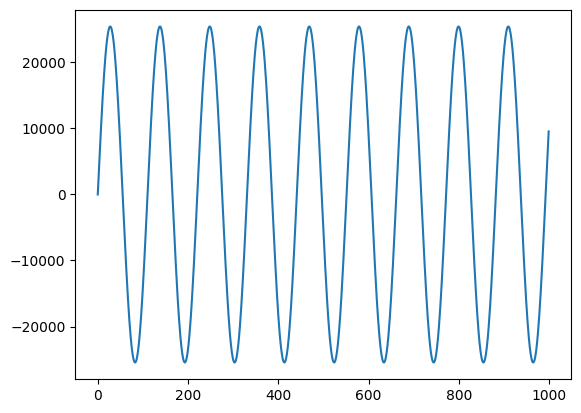

In [27]:
from scipy.fft import irfft

new_sig = irfft(yf)

plt.plot(new_sig[:1000])
plt.show()

In [28]:
norm_new_sig = np.int16(new_sig * (32767 / new_sig.max()))

write("clean.wav", SAMPLE_RATE, norm_new_sig)